In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [102]:
x_train=pd.read_excel('Data_Train.xlsx')
x_test=pd.read_excel('Test_set.xlsx')

In [103]:
x_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
x_train.shape

(10683, 11)

In [105]:
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [106]:
x_test.shape

(2671, 10)

In [107]:
x_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [108]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [109]:
x_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [110]:
x_train.dropna(inplace=True)

In [111]:
x_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [112]:
x_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [113]:
x_train.drop(columns='Additional_Info',inplace=True)

Majority of the categories in the feature 'Additional_Info' has no info. This feature seems to be less informative and can be dropped from out data set. 

In [114]:
x_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

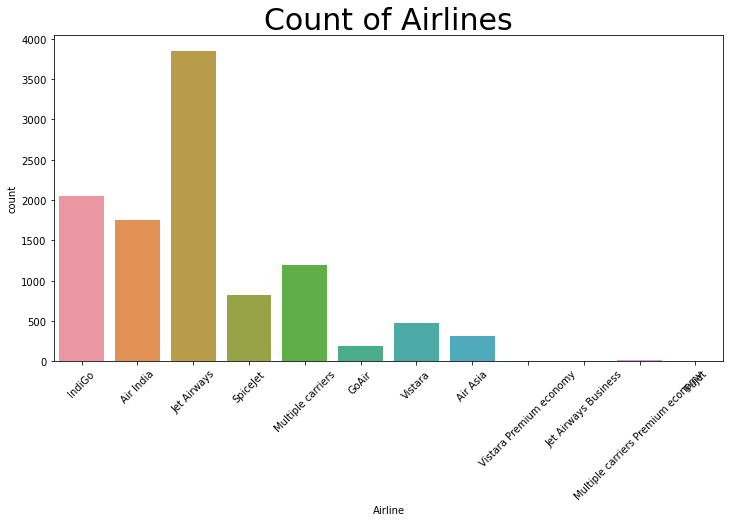

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Airline'])
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=45)
plt.show()

Majority of the booking is done for Jet Airways followed by Indigo and then Air India. 

The number of bookings for Vistara Premium Economy, Jet Airways Business and Multiple Carrier Premium Economy is very less as compared to other economy class bookings.

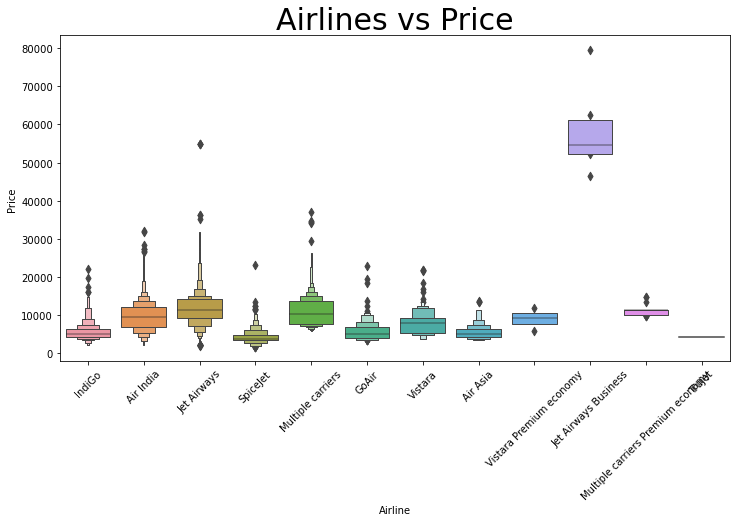

In [116]:
plt.figure(figsize=(12,6))
sns.boxenplot(x_train['Airline'], x_train['Price'])
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=45)
plt.show()

The flight price for Vistara Premium Economy is at an higher end, more than double the average price of other carriers. 

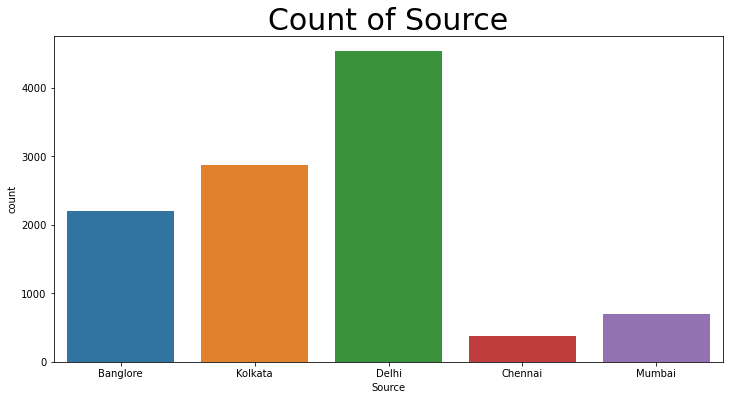

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Source'])
plt.title('Count of Source', size=30)
plt.show()

<Figure size 864x432 with 0 Axes>

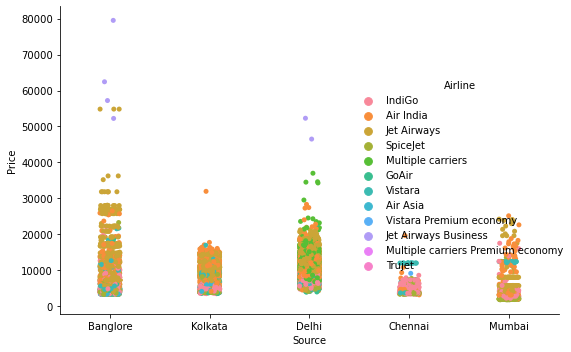

In [118]:
plt.figure(figsize=(12,6))
plot= sns.catplot(x="Source", y="Price", hue="Airline", data=x_train)
plot.set_xticklabels()
plt.tight_layout()

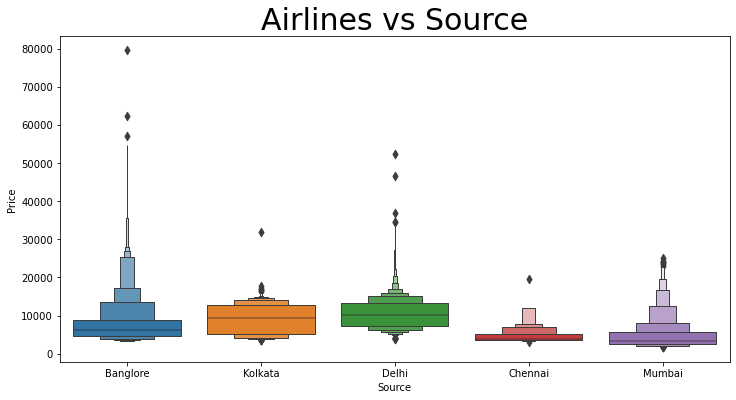

In [119]:
plt.figure(figsize=(12,6))
sns.boxenplot(x_train['Source'], x_train['Price'])
plt.title('Airlines vs Source', size=30)
plt.show()

In [120]:
x_train["Journey_day"] = pd.to_datetime(x_train.Date_of_Journey, format="%d/%m/%Y").dt.day
x_train["Journey_month"] = pd.to_datetime(x_train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [121]:
x_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

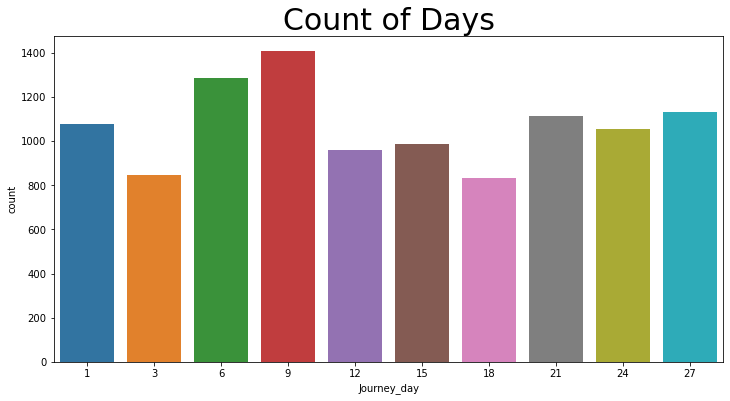

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Journey_day'])
plt.title('Count of Days', size=30)
plt.show()

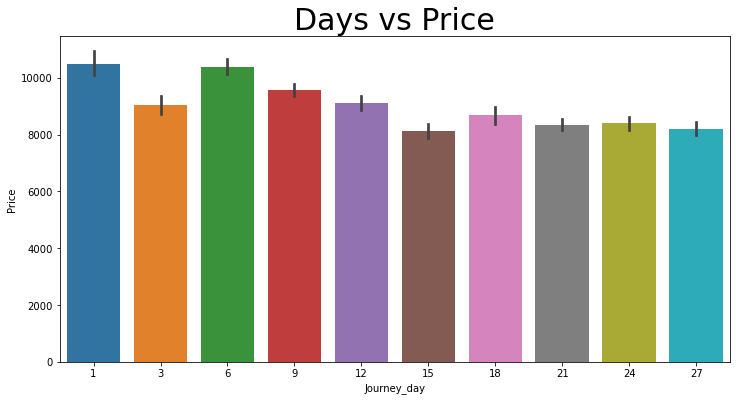

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['Journey_day'], x_train['Price'])
plt.title('Days vs Price', size=30)
plt.show()

In [124]:
x_train['Journey_month'] = x_train['Journey_month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

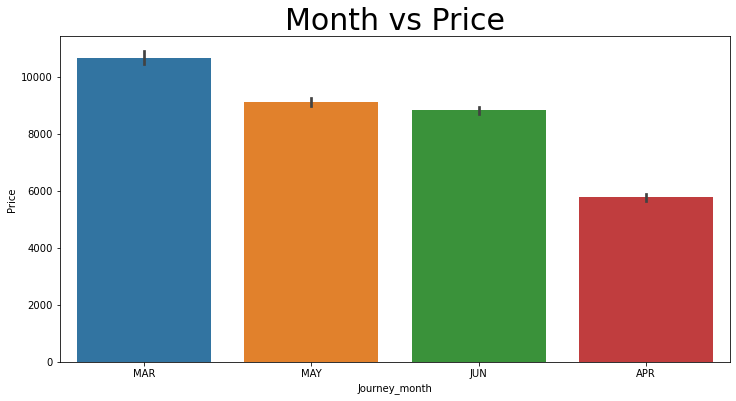

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['Journey_month'], x_train['Price'])
plt.title('Month vs Price', size=30)
plt.show()

In [126]:
x_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,MAR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,MAY
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,JUN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,MAY
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,MAR


In [127]:
# Extracting Hours
x_train["Dep_hour"] = pd.to_datetime(x_train["Dep_Time"]).dt.hour

# Now we can drop Dep_Time as it is of no use
x_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [128]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
x_train['dep_period_of_day'] = pd.cut(x_train.Dep_hour, bins, labels=names).astype(object)
x_train.drop(["Dep_hour"], axis = 1, inplace = True)
x_train['dep_period_of_day'].head()

0            night
1    early_morning
2          morning
3          evening
4        afternoon
Name: dep_period_of_day, dtype: object

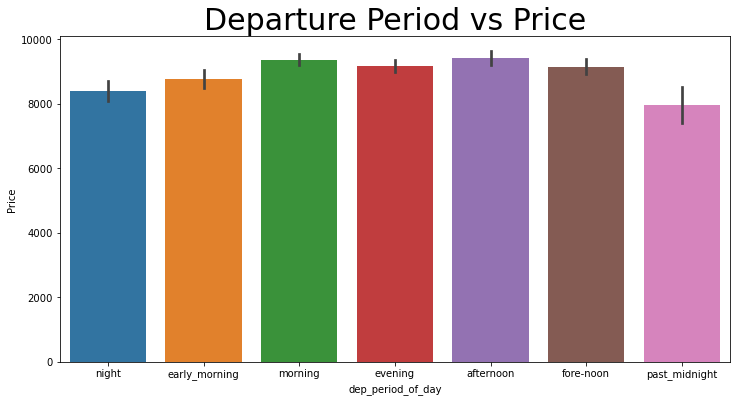

In [129]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['dep_period_of_day'], x_train['Price'])
plt.title('Departure Period vs Price', size=30)
plt.show()

The plot of departure vs period of day shows that the customers have paid higher price for morning and afternoon while the flight price are comparatively less past midnight.

In [130]:
# Extracting Hours
x_train["Arrival_hour"] = pd.to_datetime(x_train.Arrival_Time).dt.hour

# Now we can drop Arrival_Time as it is of no use
x_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [131]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
x_train['arrival_period_of_day'] = pd.cut(x_train.Arrival_hour, bins, labels=names).astype(object)
x_train.drop(["Arrival_hour"], axis = 1, inplace = True)
x_train['arrival_period_of_day'].head()

0    past_midnight
1        afternoon
2    early_morning
3            night
4            night
Name: arrival_period_of_day, dtype: object

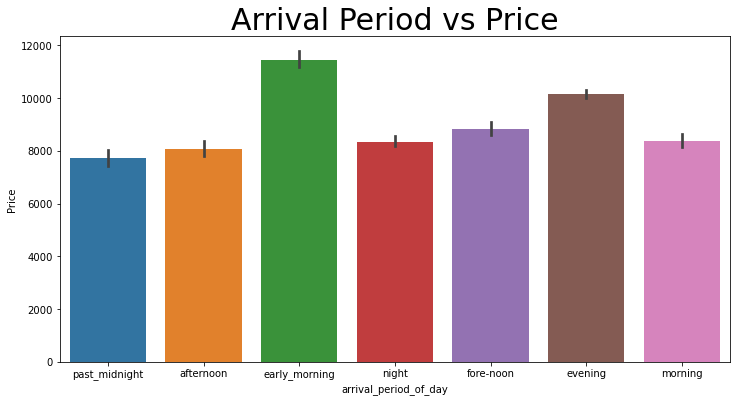

In [132]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['arrival_period_of_day'], x_train['Price'])
plt.title('Arrival Period vs Price', size=30)
plt.show()

The flight prices are highest when the arrival time is early morning followed by evening and it is least when the flight arrives past midnight.

In [133]:
duration = list(x_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [134]:
# Adding duration_hours and duration_mins list to train_data dataframe

x_train["Duration_hours"] = duration_hours
x_train["Duration_mins"] = duration_mins

In [135]:
x_train['Duration'] = (x_train['Duration_hours'])+(x_train['Duration_mins']/60)
x_train.drop(["Duration_hours"], axis = 1, inplace = True)
x_train.drop(["Duration_mins"], axis = 1, inplace = True)

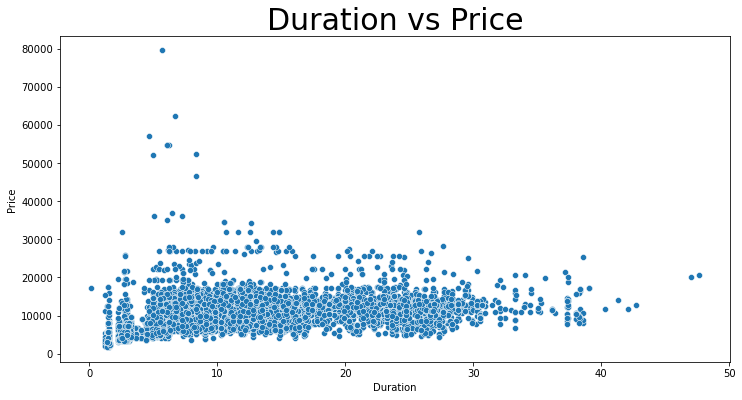

In [136]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_train['Duration'], x_train['Price'])
plt.title('Duration vs Price', size=30)
plt.show()

The flight prices are usually higher when the flight duration is long. One of the possible reasons may be the fact that duration increases for connecting flights.

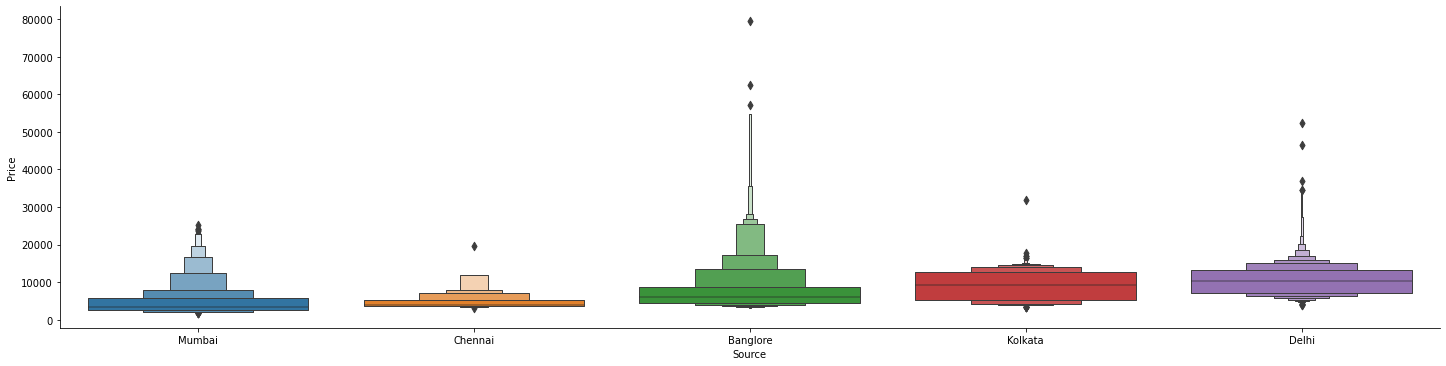

In [137]:
sns.catplot(y = "Price", x = "Source", data = x_train.sort_values("Price", ascending = True), kind="boxen", height = 5, aspect = 4)
plt.show()

The fight prices are maximum from Delhi and least from Mumbai.

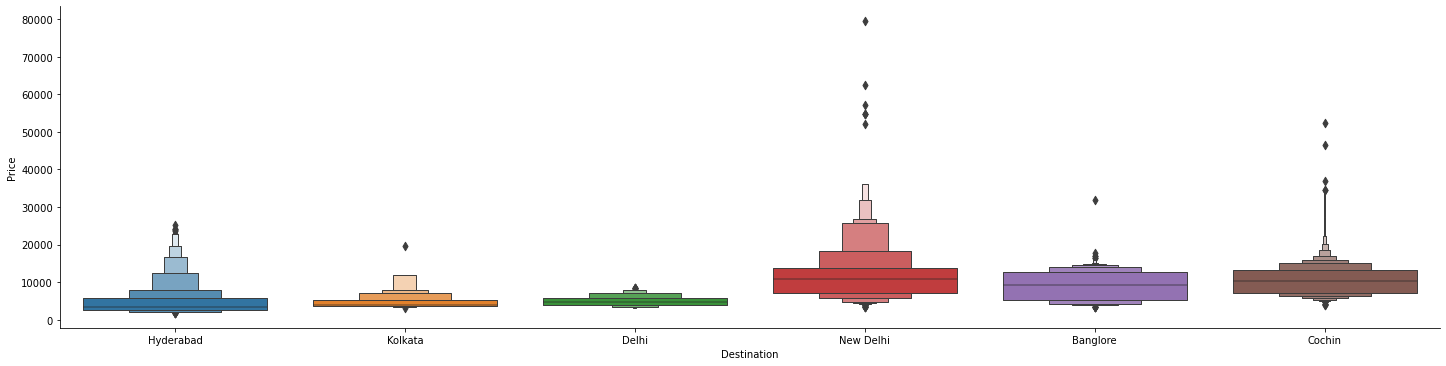

In [138]:
sns.catplot(y = "Price", x = "Destination", data = x_train.sort_values("Price", ascending = True), kind="boxen", height = 5, aspect = 4)
plt.show()

The flight prices are least for Hyderabad and maximum for Cochin

In [139]:
x_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_period_of_day,arrival_period_of_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,3897,24,MAR,night,past_midnight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,7662,1,MAY,early_morning,afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,13882,9,JUN,morning,early_morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,6218,12,MAY,evening,night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,13302,1,MAR,afternoon,night


In [140]:
x_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

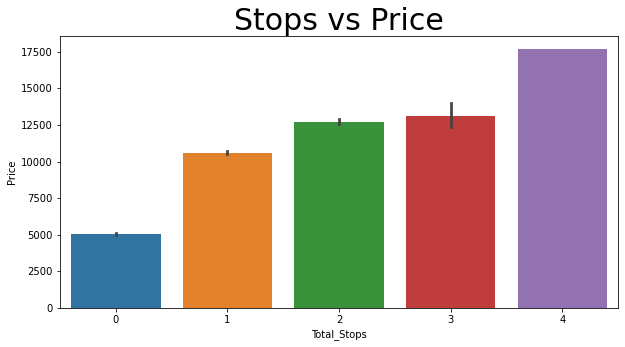

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(x_train['Total_Stops'], x_train['Price'])
plt.title('Stops vs Price', size=30)
plt.show()

In [142]:
x_train['Route_1']=x_train['Route'].str.split('→ ').str[0]
x_train['Route_2']=x_train['Route'].str.split('→ ').str[1]
x_train['Route_3']=x_train['Route'].str.split('→ ').str[2]
x_train['Route_4']=x_train['Route'].str.split('→ ').str[3]
x_train['Route_5']=x_train['Route'].str.split('→ ').str[4]

In [143]:
x_train['Route_1'].fillna("None",inplace=True)
x_train['Route_2'].fillna("None",inplace=True)
x_train['Route_3'].fillna("None",inplace=True)
x_train['Route_4'].fillna("None",inplace=True)
x_train['Route_5'].fillna("None",inplace=True)

In [144]:
x_train.drop(['Route'],axis=1,inplace=True)

In [145]:
x_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_period_of_day,arrival_period_of_day,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2.833333,0,3897,24,MAR,night,past_midnight,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,MAY,early_morning,afternoon,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,9,JUN,morning,early_morning,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,12,MAY,evening,night,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4.750000,1,13302,1,MAR,afternoon,night,BLR,NAG,DEL,None,None


In [146]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()

In [150]:
df=bi_enc.fit_transform(x_train)

In [151]:
pd.set_option('display.max_columns',None)

In [152]:
df.head()

,Airline_0,Airline_1,Airline_2,Airline_3,Airline_4,Source_0,Source_1,Source_2,Source_3,Destination_0,Destination_1,Destination_2,Destination_3,Duration,Total_Stops,Price,Journey_day,Journey_month_0,Journey_month_1,Journey_month_2,dep_period_of_day_0,dep_period_of_day_1,dep_period_of_day_2,dep_period_of_day_3,arrival_period_of_day_0,arrival_period_of_day_1,arrival_period_of_day_2,arrival_period_of_day_3,Route_1_0,Route_1_1,Route_1_2,Route_1_3,Route_2_0,Route_2_1,Route_2_2,Route_2_3,Route_2_4,Route_2_5,Route_2_6,Route_3_0,Route_3_1,Route_3_2,Route_3_3,Route_3_4,Route_3_5,Route_4_0,Route_4_1,Route_4_2,Route_4_3,Route_4_4,Route_5_0,Route_5_1,Route_5_2,Route_5_3
0,0,0,0,0,1,0,0,0,1,0,0,0,1,2.833333,0,3897,24,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,1,0,7.416667,2,7662,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,1,0,0,1,1,0,0,1,1,19.000000,2,13882,9,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,0,1,0,5.416667,1,6218,12,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,0,0,1,4.750000,1,13302,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [154]:
df.shape

(10682, 54)

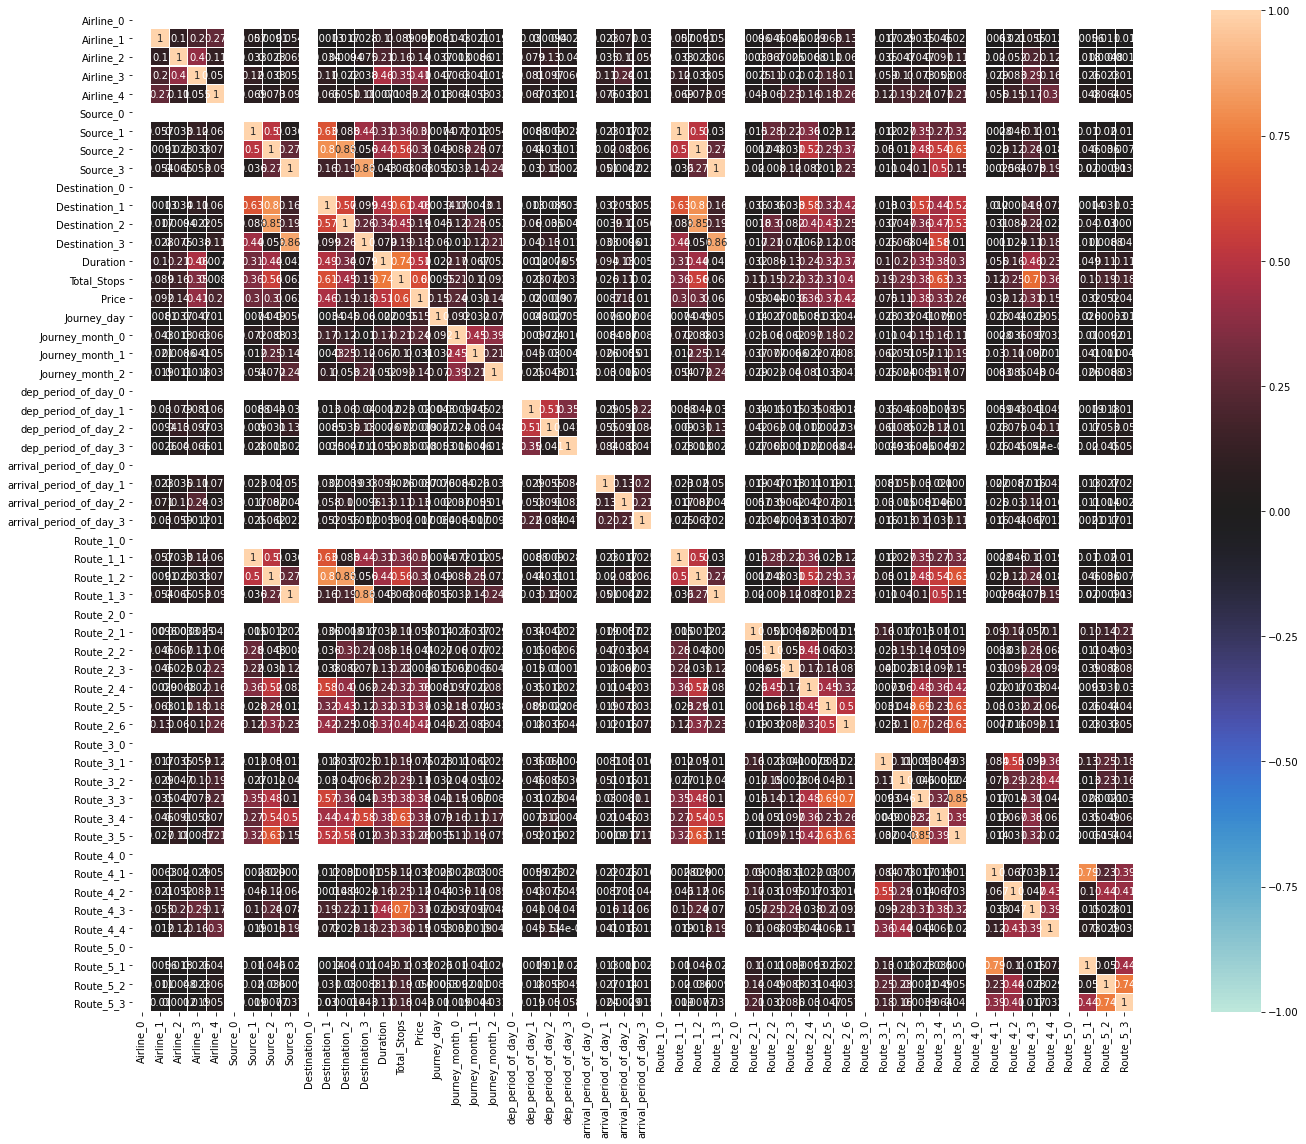

In [155]:
corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.tight_layout()

The features are not strongly corelated. This was expected since all the features in our dataset have categorical values.

In [156]:
X = df.drop('Price', axis=1)
y = df['Price']

In [157]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [159]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [160]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  2781.437829490742
Lasso :  2781.4085323068466
Ridge :  2780.8045044930036
KNeighborsRegressor :  2583.3879145658075
DecisionTreeRegressor :  2355.878366340579
RandomForestRegressor :  1825.8403364495855
AdaBoostRegressor :  3483.441018506078
GradientBoostingRegressor :  2101.1405675169262
XGBRegressor :  1679.749340607671


Decision Tree, Random Forest, Gradient Boost and XG Boost have performed better than other models. Lets tune the hyper paramwterers anch evaluate their performance.

In [172]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,25,50],
            'min_samples_leaf' : [3, 5, 7,13,15,20,50,100],
            'min_samples_split' : [3, 5, 7,13,15,20,50,100],
        }
    },
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,25,50],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9,13,15,20],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10,20,50,100, 300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,50],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8,10,15,20]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [10,20,50,100,300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [173]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished


In [174]:
performance = pd.DataFrame(score, columns=['model', 'score', 'params'])
performance

,model,score,params
0,DecisionTreeRegressor,0.721433,"{'min_samples_split': 50, 'min_samples_leaf': ..."
1,XGBRegressor,0.826695,"{'min_child_weight': 9, 'max_depth': 7, 'learn..."
2,RandomForestRegressor,0.802129,"{'n_estimators': 1000, 'min_samples_split': 2,..."
3,GradientBoostingRegressor,0.814869,"{'n_estimators': 500, 'learning_rate': 0.25, '..."


The performance of XG Boost is better than any other model. Hence, XGB Regressor is selected as our final model

In [175]:
performance['params'][1]

{'min_child_weight': 9,
 'max_depth': 7,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [177]:
final_model = XGBRegressor(min_child_weight=9,max_depth=7,learning_rate=0.25,gamma=0.4,colsample_bytree=0.5)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('RMSE of XGBRegressor : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE of XGBRegressor : 1646.1639749531894


In [178]:
final_model.score(X_train, y_train), final_model.score(X_test, y_test)

(0.9071479268950481, 0.862497375545884)

In [179]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1143.8947978760589
RMSE: 1646.1639749531894


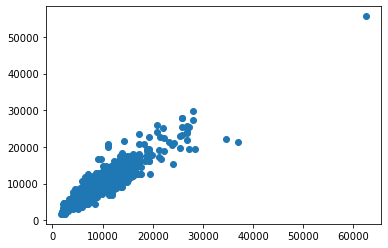

In [180]:
plt.scatter(y_test,y_pred)

XGBoost Regressor is selected as final model for prediction of flight price as its performance is better than any other model. Now lets use our test data set to predict the flight price. But before that we need to format the test set in the same way as done for training data set.

In [206]:
test_data=pd.read_excel('Test_set.xlsx')

In [207]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [182]:
test_set=test_data

In [183]:
test_set.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [185]:
test_set.drop(columns='Additional_Info',inplace=True)

In [186]:
test_set["Journey_day"] = pd.to_datetime(test_set.Date_of_Journey, format="%d/%m/%Y").dt.day
test_set["Journey_month"] = pd.to_datetime(test_set.Date_of_Journey, format="%d/%m/%Y").dt.month
test_set.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [187]:
test_set['Journey_month'] = test_set['Journey_month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

In [188]:
# Extracting Hours
test_set["Dep_hour"] = pd.to_datetime(test_set["Dep_Time"]).dt.hour

# Now we can drop Dep_Time as it is of no use
test_set.drop(["Dep_Time"], axis = 1, inplace = True)

In [189]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
test_set['dep_period_of_day'] = pd.cut(test_set.Dep_hour, bins, labels=names).astype(object)
test_set.drop(["Dep_hour"], axis = 1, inplace = True)
test_set['dep_period_of_day'].head()

0          evening
1    early_morning
2          evening
3          morning
4            night
Name: dep_period_of_day, dtype: object

In [190]:
# Extracting Hours
test_set["Arrival_hour"] = pd.to_datetime(test_set.Arrival_Time).dt.hour

# Now we can drop Arrival_Time as it is of no use
test_set.drop(["Arrival_Time"], axis = 1, inplace = True)

In [191]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
test_set['arrival_period_of_day'] = pd.cut(test_set.Arrival_hour, bins, labels=names).astype(object)
test_set.drop(["Arrival_hour"], axis = 1, inplace = True)
test_set['arrival_period_of_day'].head()

0    early_morning
1        fore-noon
2          evening
3            night
4    past_midnight
Name: arrival_period_of_day, dtype: object

In [192]:
duration = list(test_set["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [193]:
# Adding duration_hours and duration_mins list to train_data dataframe

test_set["Duration_hours"] = duration_hours
test_set["Duration_mins"] = duration_mins

In [194]:
test_set['Duration'] = (test_set['Duration_hours'])+(test_set['Duration_mins']/60)
test_set.drop(["Duration_hours"], axis = 1, inplace = True)
test_set.drop(["Duration_mins"], axis = 1, inplace = True)

In [195]:
test_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [196]:
test_set['Route_1']=test_set['Route'].str.split('→ ').str[0]
test_set['Route_2']=test_set['Route'].str.split('→ ').str[1]
test_set['Route_3']=test_set['Route'].str.split('→ ').str[2]
test_set['Route_4']=test_set['Route'].str.split('→ ').str[3]
test_set['Route_5']=test_set['Route'].str.split('→ ').str[4]

In [197]:
test_set['Route_1'].fillna("None",inplace=True)
test_set['Route_2'].fillna("None",inplace=True)
test_set['Route_3'].fillna("None",inplace=True)
test_set['Route_4'].fillna("None",inplace=True)
test_set['Route_5'].fillna("None",inplace=True)

In [198]:
test_set.drop(['Route'],axis=1,inplace=True)

In [199]:
df=bi_enc.fit_transform(test_set)

In [200]:
predicted=pd.DataFrame({'Predicted Price':(final_model.predict(df))})

In [210]:
test_data=pd.read_excel('Test_set.xlsx')

In [211]:
df_pred=pd.concat([test_data,predicted],axis=1)

In [212]:
df_pred.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,8211.043945
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,8504.914062
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,8028.833496
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,11075.991211
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4379.452148


In [213]:
import pickle
with open ('FlightPricePrediction.sav','wb') as f:
    pickle.dump(final_model,f)